<a href="https://colab.research.google.com/github/markerxz/naturalselection/blob/main/genetic_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np



sizei = 1000
sizej = 1000
n_food = int(200)
n_creature = 100


def genfood():
    foodzonei = [int(0 + sizei//10) , int(sizei - sizei//10)]
    foodzonej = [int(0 + sizej//10) , int(sizej - sizej//10)]
    food = []


    for j in range(n_food):
        food.append((random.uniform(foodzonei[0],foodzonei[1]),random.uniform(foodzonej[0],foodzonej[1])))
    return food
import math
def checkbound(offset,pos):
    
    i = offset[0]
    j = offset[1]
    if offset[0] + pos[0] > sizei:
        offset[0] = sizei - pos[0]
    if offset[0] + pos[0] < 0:
        offset[0] = (pos[0]*-1)
    if offset[1] + pos[1] > sizej:
        offset[1] = sizej - pos[1]
    if offset[1] + pos[1] < 0:
        offset[1] = (pos[1]*-1)
    return offset
    
class Creatures:
    def randspawn(self):
        side = random.randint(1,4)
        if side == 1:
            yo = [(0.1  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
        if side == 2:
            yo = [(0.9  * sizei),random.uniform((0.1  * sizej),(0.9  * sizej))]
        if side == 3:
            yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.1  * sizei)]
        if side == 4:
            yo = [random.uniform((0.1  * sizei),(0.9  * sizei)),(0.9  * sizei)]
        return yo
    speed = 10
    sight = 10
    pos = [0,0]
    hunger = False
    name = ' '
    score = 0
    def __init__(self):
        self.speed = 30
        self.sight = 30
        self.pos = self.randspawn()
        self.hunger = False
        self.name = ' '
        self.score = 0
    def randmov(self):
        di = random.uniform(0,360)
        offset = checkbound([self.speed*math.sin(di),self.speed*math.cos(di)],self.pos)
        self.pos[0] += offset[0]
        self.pos[1] += offset[1]
        return offset
    def checkfood(self):
        dis = [((food[i][0]-self.pos[0])**2+(food[i][1]-self.pos[1])**2)**(1/2) for i in range(len(food))]
        #print(len(dis))
        i = 0
        while i < len(food):
            
            if dis[i] <= self.sight:
                self.score += 1
                food.pop(i)
            i+=1
        
                


In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
creatures = [Creatures() for i in range(n_creature)]
mutantvalue = 0.05
n_gen = 200
poscreas = [[] for i in range(n_gen)]
posfood = [[] for i in range(n_gen)]


    
time = 0
maxtime = 75
maxspeed = 1000
maxsight = 1000
speedcrea = [[0 for i in range(maxspeed)] for i in range(n_gen)]
sightcrea = [[0 for i in range(maxsight)] for i in range(n_gen)]
maxsp_in_gen = [0 for i in range(n_gen)]
minsp_in_gen = [2e9 for i in range(n_gen)]
avgsp_in_gen = [0 for i in range(n_gen)]
maxsi_in_gen = [0 for i in range(n_gen)]
minsi_in_gen = [2e9 for i in range(n_gen)]
avgsi_in_gen = [0 for i in range(n_gen)]
for gen in range(n_gen):
    food = genfood()
    #print("GEN = ",gen," ncreas = ",len(creatures))
    #plt.title(str("GENERATION : "+str(gen)))
    #print("GENERATION :",gen)
    for crea in creatures:
        crea.pos = crea.randspawn()
    time = 0
    
    poscreas_in_this_gen = list([])
    posfood_in_this_gen = list([])
    
    while time < maxtime:
        poscreas_in_this_gen.append([])
        posfood_in_this_gen.append([])
        for crea in creatures:
            crea.randmov()
            crea.checkfood()
            cache = [crea.pos[0],crea.pos[1]]
            poscreas_in_this_gen[-1].append(cache)
            
        
        for f in food:
            
            cache = [f[0],f[1]]
            posfood_in_this_gen[-1].append(cache)
            
            
        time+=1
        #camera.snap()
    newcreas = []
    for crea in creatures:
        maxsp_in_gen[gen] = max(maxsp_in_gen[gen],int(crea.speed))
        maxsi_in_gen[gen] = max(maxsi_in_gen[gen],int(crea.sight))
        avgsp_in_gen[gen] += int(crea.speed)
        avgsi_in_gen[gen] += int(crea.sight)
        minsp_in_gen[gen] = min(minsp_in_gen[gen],int(crea.speed))
        minsi_in_gen[gen] = min(minsi_in_gen[gen],int(crea.sight))
        speedcrea[gen][int(crea.speed)]+=1
        sightcrea[gen][int(crea.sight)]+=1
    avgsp_in_gen[gen] /= len(creatures)
    avgsi_in_gen[gen] /= len(creatures)
    maxsp = -1
    maxsi = -1
    for i in range(len(creatures)):
        crea = creatures[i]
        
        if crea.score > 2:
            parent = Creatures()
            parent.speed = crea.speed
            parent.sight = crea.sight
            #newcreas.append(parent)
            #newcreas[-1].score = 0
            for i in range(crea.score//2):
                newborn = Creatures()
                newborn.speed = parent.speed * random.uniform(1-mutantvalue,1+mutantvalue)
                newborn.sight = parent.sight * random.uniform(1-mutantvalue,1+mutantvalue)
                maxsp = max(maxsp,newborn.speed)
                maxsi = max(maxsi,newborn.sight)
                
                newcreas.append(newborn)
    
    creatures = newcreas[:]
    random.shuffle(creatures)
  
    #print([maxsp,maxsi])
    poscreas[gen]= list(poscreas_in_this_gen[:])
    
    posfood[gen]= list(posfood_in_this_gen[:])
    

print("FINISH")

FINISH


Text(0.5, 1.0, 'fill between y1 and 0')

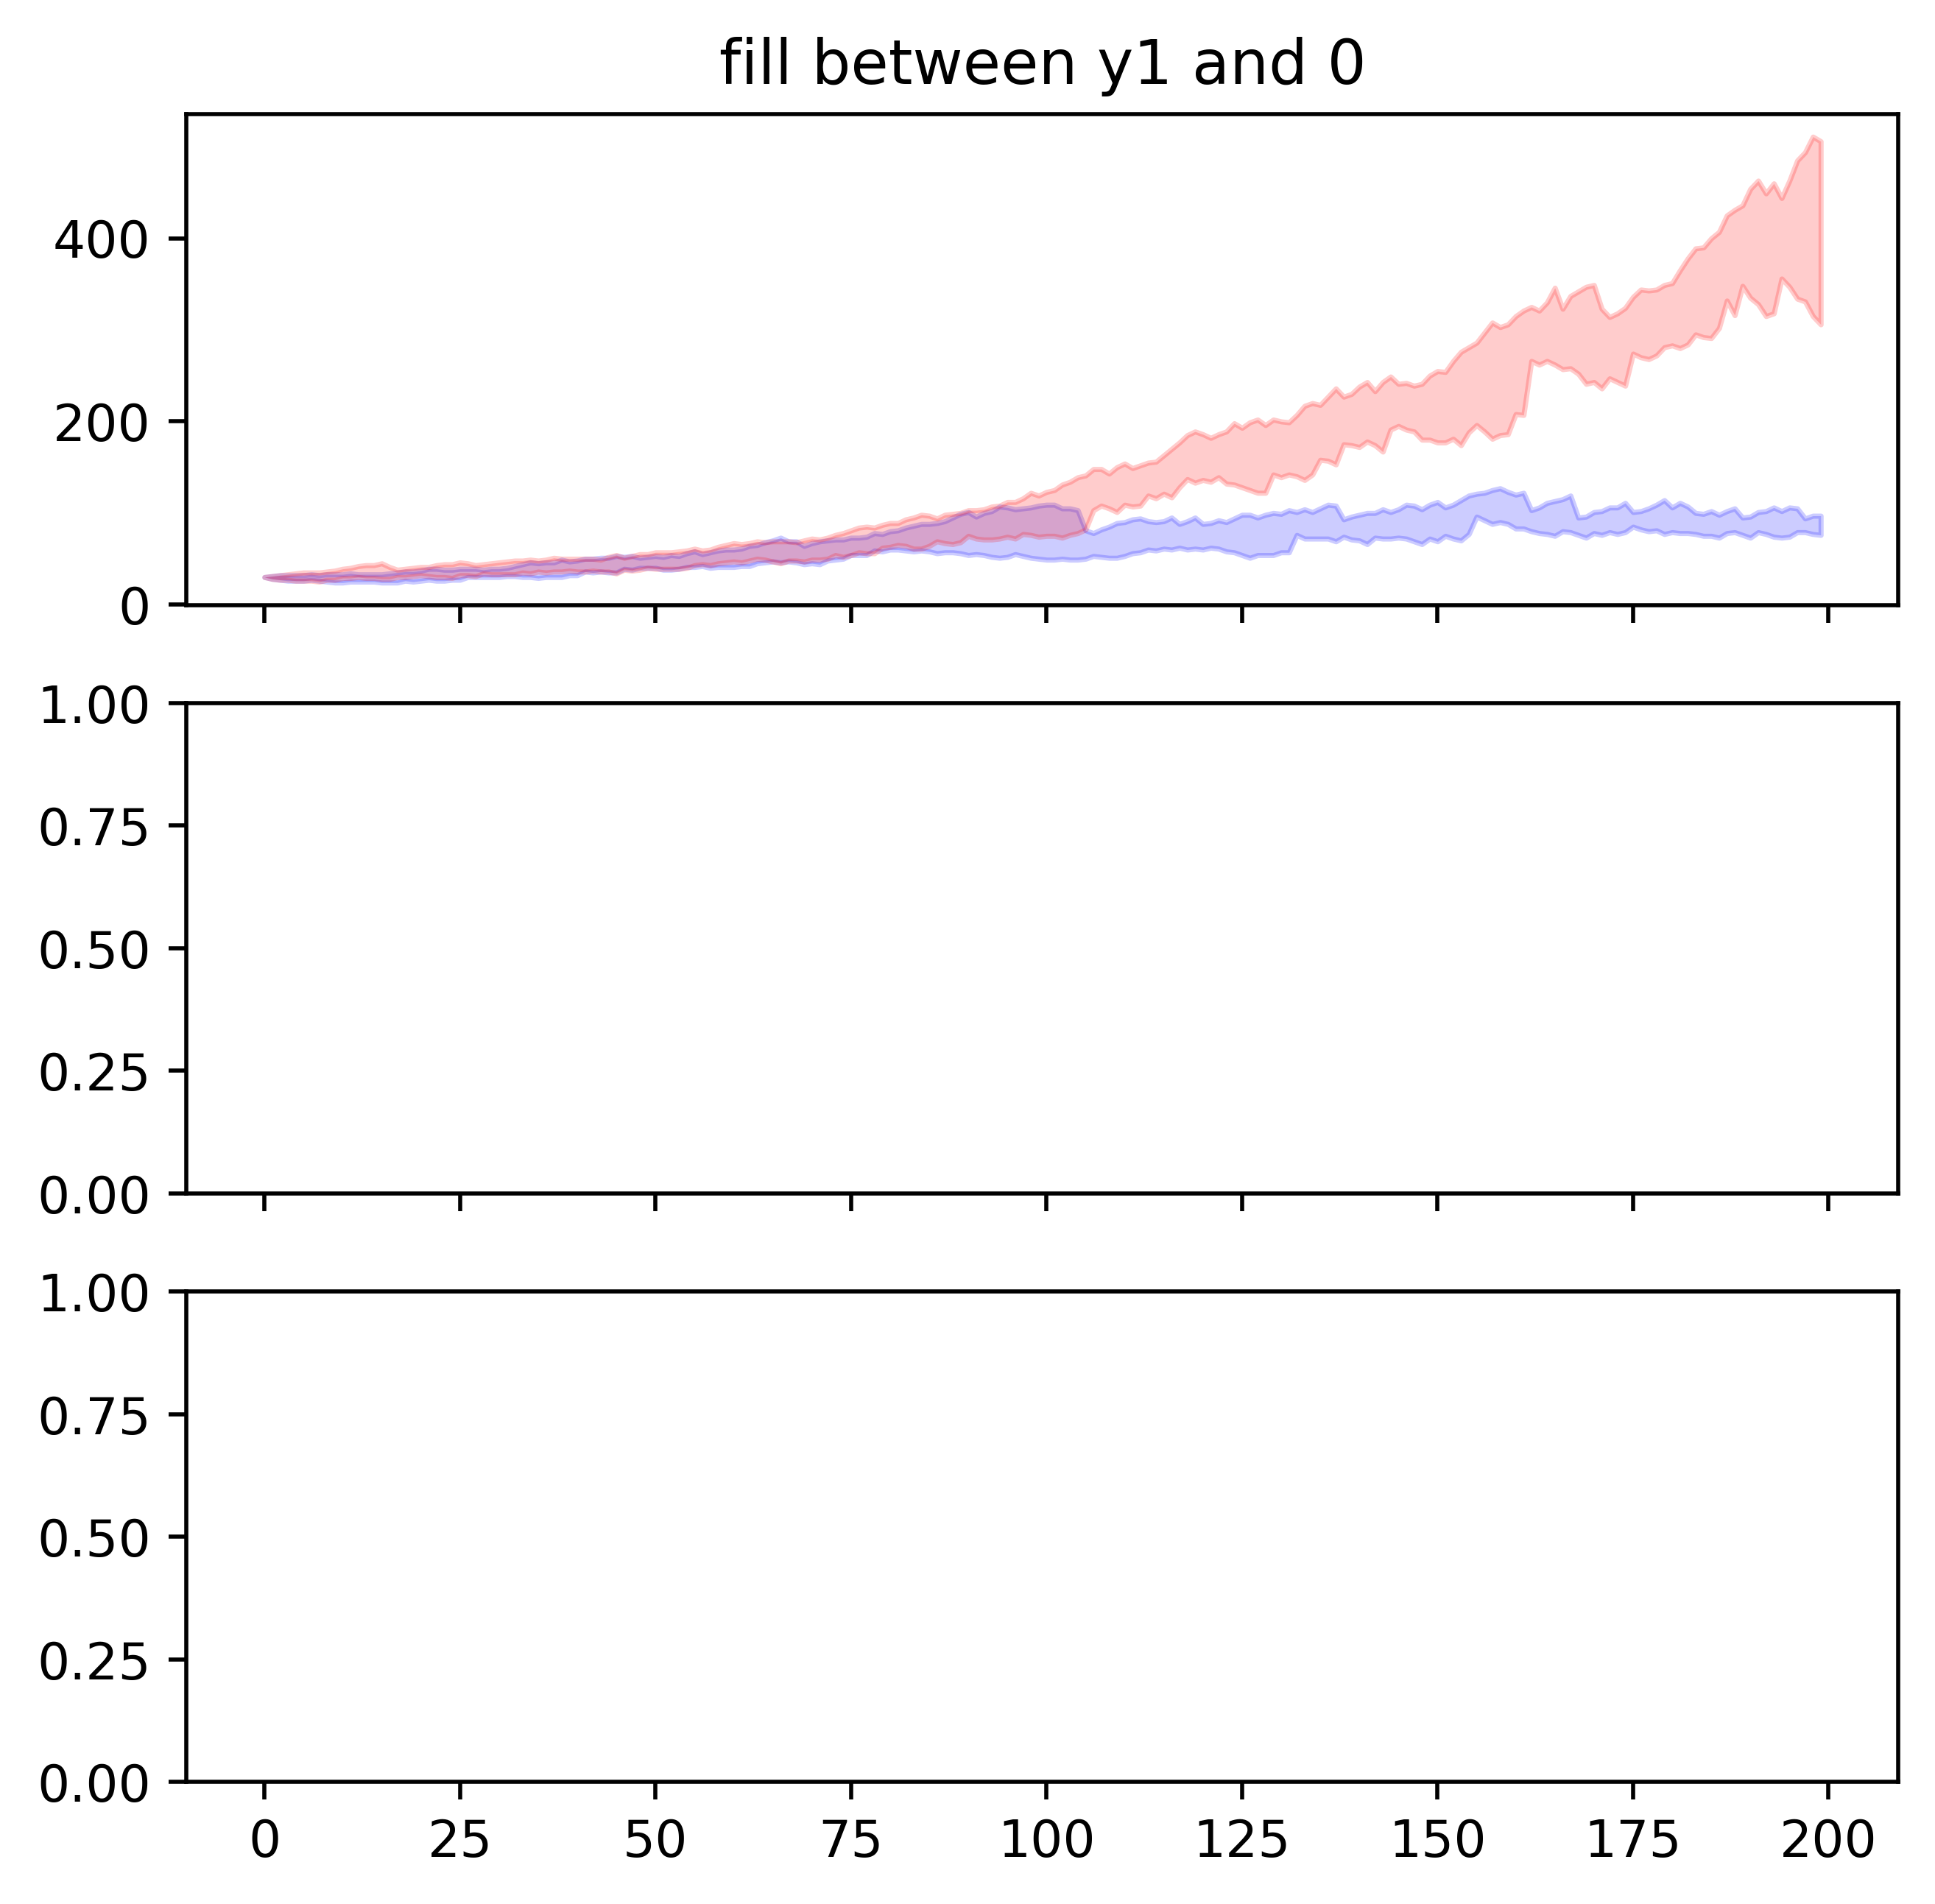

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.fill_between(np.arange(0, n_gen, 1), maxsp_in_gen,minsp_in_gen, alpha=0.2,color='b')
ax1.fill_between(np.arange(0, n_gen, 1), maxsi_in_gen,minsi_in_gen, alpha=0.2,color='r')
ax1.set_title('fill between y1 and 0')

In [9]:
print(maxsp_in_gen)

[30, 31, 32, 34, 35, 36, 38, 35, 36, 36, 37, 38, 38, 39, 40, 41, 42, 41, 42, 42, 41, 42, 44, 43, 45, 43, 43, 45, 45, 47, 48, 47, 48, 50, 52, 49, 51, 51, 52, 52, 50, 52, 50, 52, 52, 52, 52, 52, 54, 53, 54, 53, 53, 54, 56, 59, 60, 60, 62, 61, 61, 63, 65, 65, 67, 70, 70, 68, 71, 71, 71, 74, 74, 74, 70, 72, 73, 76, 76, 72, 73, 73, 75, 75, 77, 80, 83, 81, 79, 83, 87, 86, 88, 89, 92, 90, 94, 93, 88, 88, 90, 93, 94, 95, 97, 97, 96, 93, 96, 91, 95, 95, 93, 96, 98, 99, 98, 97, 97, 100, 102, 105, 108, 110, 114, 108, 113, 115, 120, 114, 106, 108, 101, 100, 104, 100, 104, 106, 93, 97, 98, 88, 90, 93, 89, 92, 91, 92, 94, 96, 96, 98, 96, 90, 85, 84, 84, 87, 90, 91, 92, 93, 95, 94, 96, 97, 96, 99, 103, 104, 109, 112, 112, 113, 118, 121, 122, 119, 123, 117, 101, 99, 99, 98, 99, 100, 104, 100, 94, 96, 96, 95, 96, 94, 92, 92, 91, 92, 92, 93]


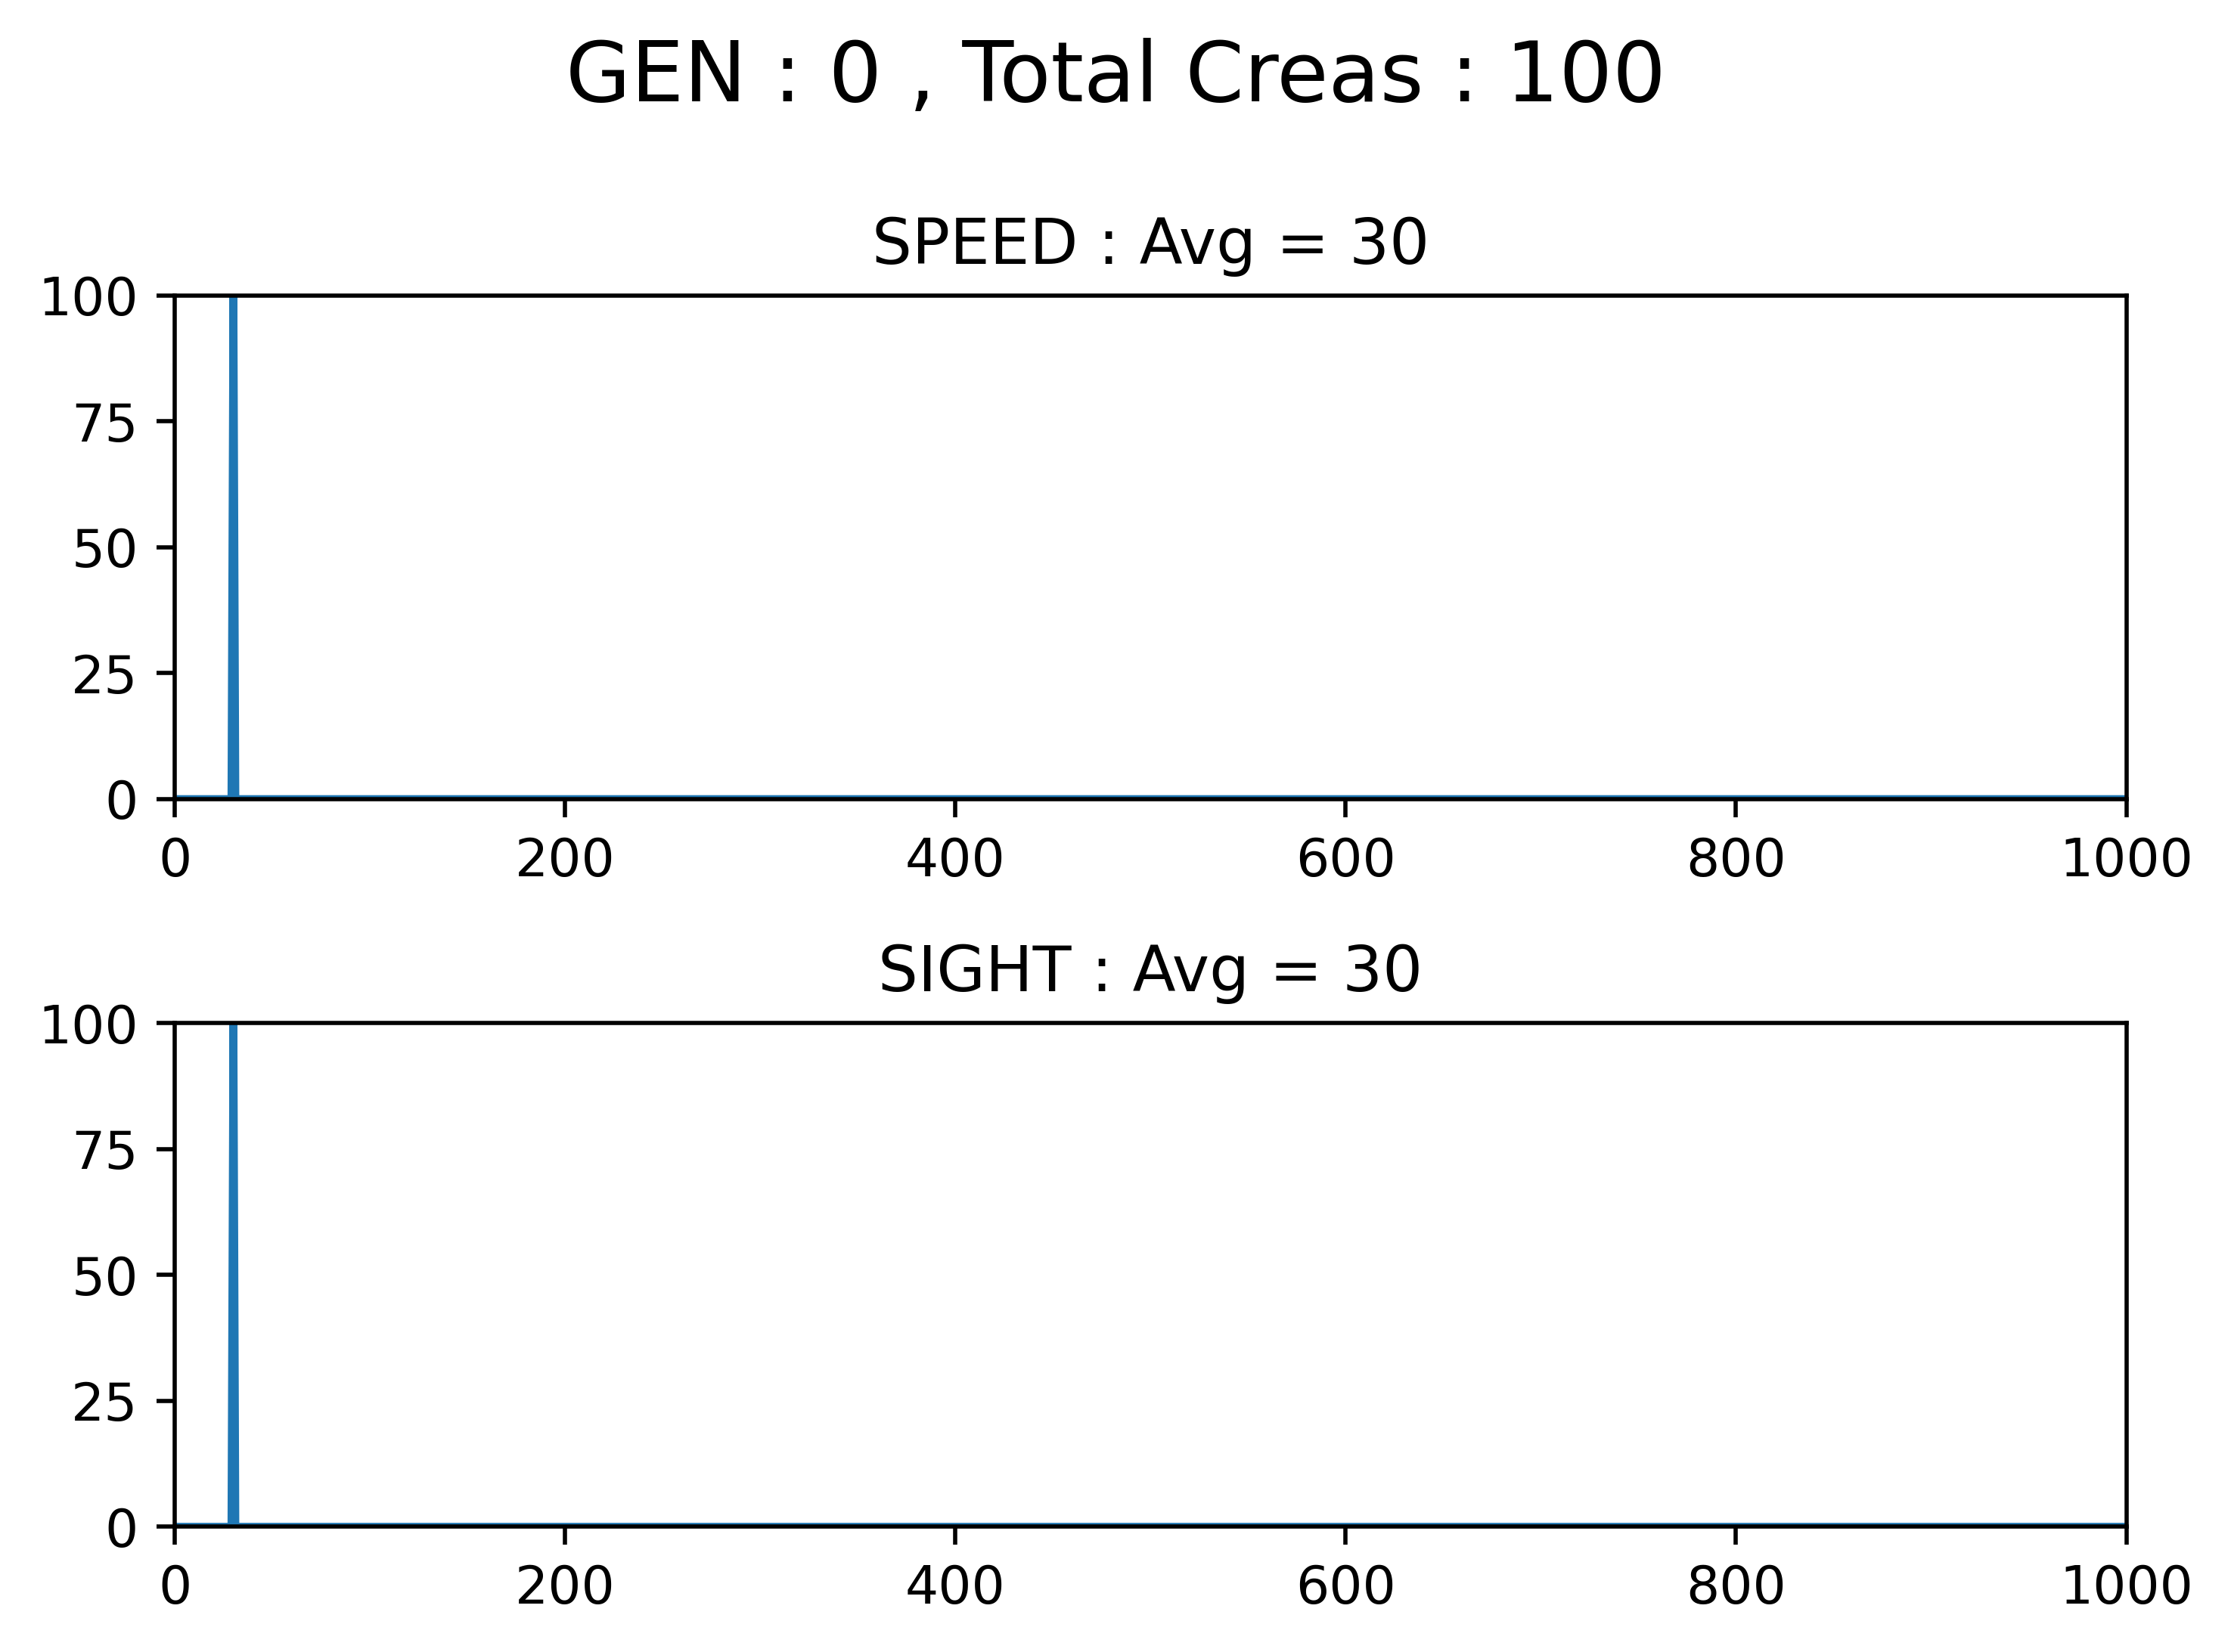

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, axs = plt.subplots(2)

plt.xticks([])
plt.yticks([])
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
scats = []
gp = []
'''ax.set_ylim(0,sizei)
ax.set_xlim(0,sizej)'''
axs[0].set_ylim(0,n_creature)
axs[0].set_xlim(0,maxspeed)
axs[0].plot([s for s in range(0,maxspeed)],[0 for i in range(0,maxspeed)])
axs[1].set_ylim(0,n_creature)
axs[1].set_xlim(0,maxsight)
axs[1].plot([s for s in range(0,maxsight)],[0 for i in range(0,maxsight)])
def run(i):
    
    total_creas = 0
    cpspeed = speedcrea[i][:]
    cpsight = sightcrea[i][:]
    sumspeed = sumsight = 0
    for j in range(len(cpspeed)):
        total_creas+=cpspeed[j]
        sumspeed += j*cpspeed[j]
        sumsight += j*cpsight[j]
    axs[0].clear()
    axs[1].clear()
    
    maxcrea = 100
    
    plt.suptitle(str("GEN : "+str(i)+" , Total Creas : "+str(total_creas)), size=16, y=1.08)
    axs[0].set_title('SPEED : Avg = '+str(sumspeed//total_creas))
    axs[0].set_ylim(0,maxcrea)
    axs[0].set_xlim(0,maxspeed)
    #axs[0].set_xlabel(str('AVG Speed : '))
    axs[0].plot([s for s in range(0,maxspeed)],cpspeed)
    axs[1].set_title('SIGHT : Avg = '+str(sumsight//total_creas))
    axs[1].set_ylim(0,maxcrea)
    axs[1].set_xlim(0,maxsight)
    #axs[1].set_xlabel(str('AVG Sight : '+str(sumsight//total_creas)))
    axs[1].plot([s for s in range(0,maxsight)],cpsight)
    plt.tight_layout()
    
    
    

ani = animation.FuncAnimation(fig, run, n_gen, blit=False, interval=500,
    repeat=False)
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

# Change the video bitrate as you like and add some metadata.
mywriter = FFMpegWriter( bitrate=1000, metadata=metadata)
ani.save('COMBINE_keepparent_A1kx1k_M5P.mp4', writer=mywriter)
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#fig, (ax1, ax2) = plt.subplots(2,1)
fig, ax = plt.subplots()
plt.xticks([])
plt.yticks([])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
scats = []

ax.set_ylim(0,sizei)
ax.set_xlim(0,sizej)


def run(i):
    # update the data
    #t, y1, y2 = data
    
    gen = i//maxtime
    time = i%maxtime
    if time == 0:
        print(gen)
    plt.title(str("GEN : "+str(gen) +" time : "+str(time)))
    global scats
    for scat in scats:
        scat.remove()
    scats = []
    for f in posfood[gen][time]:
        scats.append(ax.scatter(f[0],f[1],color='r',s=40))
    for c in poscreas[gen][time]:
        scats.append(ax.scatter(c[0],c[1],color='b',s=40))
    #print(scats)
    
    

ani = animation.FuncAnimation(fig, run, n_gen*maxtime, blit=False, interval=50,
    repeat=False)
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

# Change the video bitrate as you like and add some metadata.
mywriter = FFMpegWriter( bitrate=500, metadata=metadata)
ani.save('heyX2.mp4')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#fig, (ax1, ax2) = plt.subplots(2,1)
fig, ax = plt.subplots()
plt.xticks([])
plt.yticks([])
plt.rcParams['figure.dpi'] = 75
plt.rcParams['savefig.dpi'] = 75
scats = []

ax.set_ylim(0,sizei)
ax.set_xlim(0,sizej)


def run(i):
    # update the data
    #t, y1, y2 = data
    
    gen = i//maxtime
    time = i%maxtime
    if time == 0:
        print(gen)
    plt.title(str("GEN : "+str(gen) +" time : "+str(time)))
    global scats
    for scat in scats:
        scat.remove()
    scats = []
    for f in posfood[gen][time]:
        scats.append(ax.scatter(f[0],f[1],color='r',s=40))
    for c in poscreas[gen][time]:
        scats.append(ax.scatter(c[0],c[1],color='b',s=40))
    #print(scats)
    
    

ani = animation.FuncAnimation(fig, run, n_gen*maxtime, blit=False, interval=50,
    repeat=False)
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

# Change the video bitrate as you like and add some metadata.
mywriter = FFMpegWriter( bitrate=250, metadata=metadata)
ani.save('heyX2S.mp4')
plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


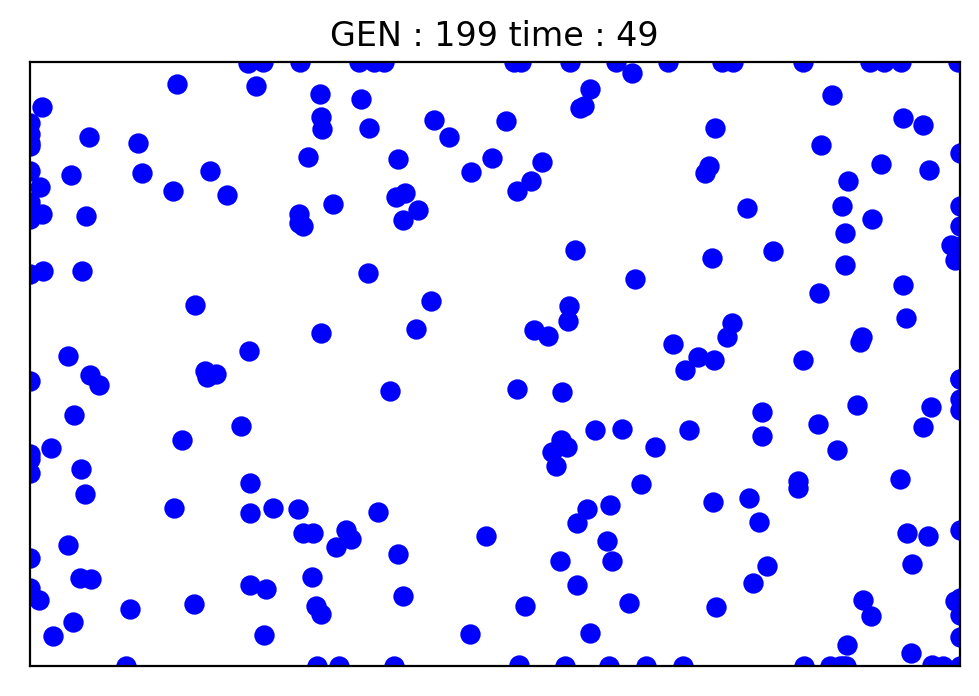

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#fig, (ax1, ax2) = plt.subplots(2,1)
fig, ax = plt.subplots()
plt.xticks([])
plt.yticks([])
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
scats = []

ax.set_ylim(0,sizei)
ax.set_xlim(0,sizej)


def run(i):
    # update the data
    #t, y1, y2 = data
    
    gen = i//maxtime
    time = i%maxtime
    if time == 0:
        print(gen)
    plt.title(str("GEN : "+str(gen) +" time : "+str(time)))
    global scats
    for scat in scats:
        scat.remove()
    scats = []
    for f in posfood[gen][time]:
        scats.append(ax.scatter(f[0],f[1],color='r',s=40))
    for c in poscreas[gen][time]:
        scats.append(ax.scatter(c[0],c[1],color='b',s=40))
    #print(scats)
    
    

ani = animation.FuncAnimation(fig, run, n_gen*maxtime, blit=False, interval=50,
    repeat=False)
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

# Change the video bitrate as you like and add some metadata.
mywriter = FFMpegWriter( bitrate=-1, metadata=metadata)
ani.save('heySuckyoz.mp4')
plt.show()